In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


<font size=5>XES Analysis and Visualization Test</br>NO ROTATION</font>

In [2]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='xcs',experiment_id='xcsc00121',lcls_run=21)
xes=XSpect.XSpect_Controller.XESBatchAnalysis()
xes.end_index=5000
xes.mintime=-1
xes.maxtime=99
xes.numpoints=100
xes.set_key_aliases()
xes.rois=[[35,65],[120,150]]
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
#xes.add_filter('simultaneous','time_tool_ampl',0.15)
xes.run_parser(['216'])

In [3]:
start=time.time()
#xes.primary_analysis_parallel_loop(4,xes_experiment)
xes.primary_analysis_loop(xes_experiment)
end=time.time()

(3547, 700)
(1417, 700)


Text(0.5, 0, 'Shot')

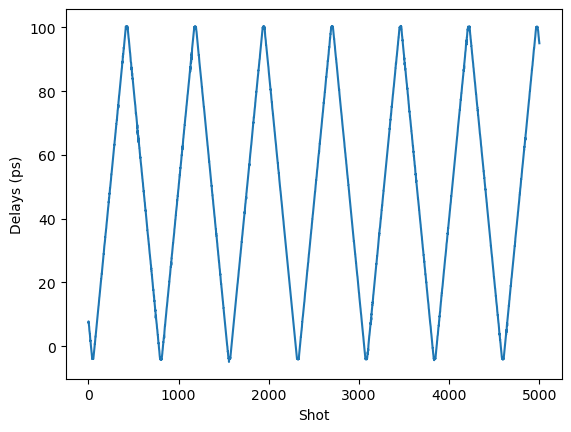

In [4]:
plt.plot(xes.analyzed_runs[0].delays)
plt.ylabel('Delays (ps)')
plt.xlabel('Shot')

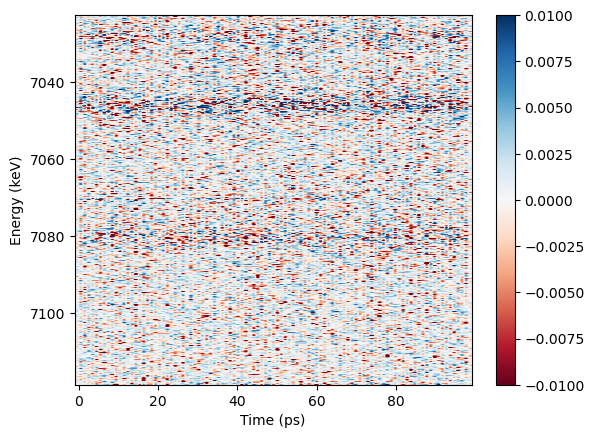

In [5]:
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_spectra(xes_analysis=xes,xes_key='epix_ROI_1_xray_not_laser_time_binned',xes_laser_key='epix_ROI_1_simultaneous_laser_time_binned')
v.vmin=-0.01
v.vmax=0.01
v.plot_2d_difference_spectrum(xes)

Text(0.5, 1.0, 'All shots summed')

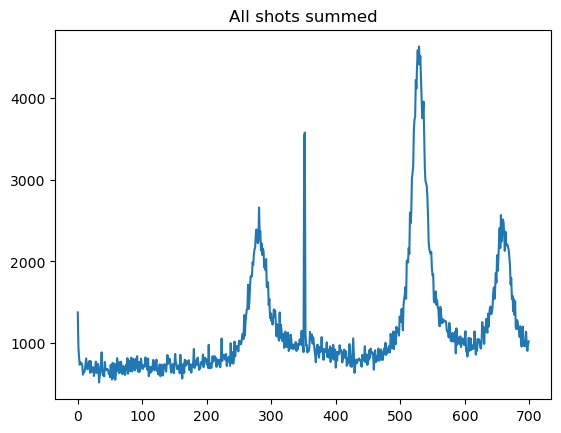

In [6]:
plt.plot(np.sum(xes.analyzed_runs[0].epix_ROI_1,axis=0))
plt.title('All shots summed')

In [7]:
for j,k in zip(xes.analyzed_runs[0].status_datetime,xes.analyzed_runs[0].status):
    print(j,k)

2024-01-21 23:00:05 New
2024-01-21 23:00:05 Obtained shot properties
2024-01-21 23:00:08 HDF5 import of keys completed. Time: 2.62 seconds
2024-01-21 23:00:09 HDF5 import of keys completed kept as hdf5 dataset. Time: 1.62 seconds
2024-01-21 23:00:11 Spatially reduced detector: epix with combined ROI indices: 35-65, 120-150
2024-01-21 23:00:11 Purged key to save room: epix
2024-01-21 23:00:11 Shots combined for detector epix_ROI_1 on filters: simultaneous and laser into epix_ROI_1_simultaneous_laser
2024-01-21 23:00:11 Shots (1417) separated for detector epix_ROI_1 on filters: xray and laser into epix_ROI_1_xray_laser
2024-01-21 23:00:11 Generated timing bins from -1.000000 to 99.000000 in 100 steps.
2024-01-21 23:00:11 Shots combined for detector timing_bin_indices on filters: simultaneous and laser into timing_bin_indices_simultaneous_laser
2024-01-21 23:00:11 Shots (1417) separated for detector timing_bin_indices on filters: xray and laser into timing_bin_indices_xray_laser
2024-01-2

In [8]:
np.save('XES_Time_Domain.npy',xes.difference_spectrum)